# Exploring `cactice`

This notebook demonstrates basic `cactice` usage and explores some use cases.

## Reading data into `cactice`

First we review the formats `cactice` supports and demonstrate how to read some sample data. `cactice` currently supports 2 formats:

- comma- or tab-delimited data (CSV/TSV)
- text grids (2D character arrays)

### CSV files

`cactice` can read 1 or more grids from a CSV or TSV file containing columns for:

- grid index
- class label
- row index
- column index

By default `cactice` expects to find columns named `Grid`, `Class`, `I`, and `J`, respectively. Alternative mappings can also be provided. Note that the file *must* begin with a header row.

For instance, to read in some sample grids from a CSV file:

In [1]:
from typing import Dict
import numpy as np
from cactice.fileio import read_grids_csv

grids: Dict[str, np.ndarray] = read_grids_csv('../testdata/grids.csv')

### Text files

`cactice` can also read a single grid from a text file. The text is interpreted as a 2-dimensional character array, with newlines delimiting rows and each distinct character a class.

For instance:

In [2]:
from cactice.fileio import read_grid_txt

grids['from text'] = read_grid_txt('../testdata/grid.txt')

## Computing summary statistics

### Grid cell class distribution

Next we can calculate the grid cell class distribution across all grids and on a per-grid basis.

In [3]:
from pprint import pprint
import cactice.stats as stats

grids_l = list(grids.values())
classes = stats.classes(grids_l)

print("Overall class distribution:")
pprint(classes)

for name, grid in grids.items():
    print(f"Grid {name} cell class distribution:")
    pprint(stats.classes([grid]))

Overall class distribution:
{'1': 0.4397, '2': 0.2069, '3': 0.1207, '4': 0.2328}
Grid 1 cell class distribution:
{'1': 0.333, '2': 0.267, '3': 0.4}
Grid 2 cell class distribution:
{'1': 0.45, '2': 0.2167, '3': 0.1167, '4': 0.2167}
Grid 3 cell class distribution:
{'1': 0.2174, '2': 0.2609, '3': 0.087, '4': 0.4348}
Grid 4 cell class distribution:
{'1': 0.2947, '2': 0.2579, '3': 0.1421, '4': 0.3053}
Grid from text cell class distribution:
{'1': 1.0}


In [4]:
bonds_h, bonds_v = stats.undirected_bonds(grids_l)

print("Overall undirected bond distribution (horizontal):")
pprint(bonds_h)
print("Overall undirected bond distribution (vertical):")
pprint(bonds_v)

for name, grid in grids.items():
    grid_bonds_h, grid_bonds_v = stats.undirected_bonds([grid])

    print(f"Grid '{name}' undirected bond distribution (horizontal):")
    pprint(grid_bonds_h)
    print(f"Grid '{name}' undirected bond distribution (vertical):")
    pprint(grid_bonds_v)

Overall undirected bond distribution (horizontal):
{'11': 0.2156862745,
 '12': 0.1421568627,
 '13': 0.0833333333,
 '14': 0.1568627451,
 '22': 0.0490196078,
 '23': 0.0735294118,
 '24': 0.112745098,
 '33': 0.0,
 '34': 0.0784313725,
 '44': 0.0882352941}
Overall undirected bond distribution (vertical):
{'11': 0.1764705882,
 '12': 0.1428571429,
 '13': 0.0882352941,
 '14': 0.1638655462,
 '22': 0.0588235294,
 '23': 0.0756302521,
 '24': 0.1218487395,
 '33': 0.0168067227,
 '34': 0.0798319328,
 '44': 0.0756302521}
Grid '[[1 2 2 3 1 3 2 1 3 3 2 3 3 1 1 0]]' undirected bond distribution (horizontal):
{}
Grid '[[1 2 2 3 1 3 2 1 3 3 2 3 3 1 1 0]]' undirected bond distribution (vertical):
{'11': 0.0714285714,
 '12': 0.1428571429,
 '13': 0.2857142857,
 '14': 0.0,
 '22': 0.0714285714,
 '23': 0.2857142857,
 '24': 0.0,
 '33': 0.1428571429,
 '34': 0.0,
 '44': 0.0}
Grid '[[1 1 4 4 1 4 4 1 1 4 2 1 0 1 2 0]
 [0 0 2 2 3 1 2 0 0 4 0 3 2 4 3 4]
 [2 1 0 3 4 1 1 4 1 1 2 4 0 4 1 1]
 [1 4 2 1 1 0 2 1 1 2 1 0 0 0 0 

## Plotting grids

Next, inspect grids visually.

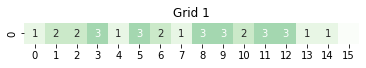

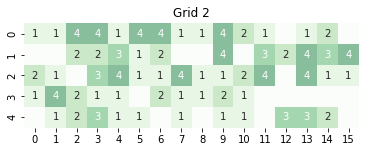

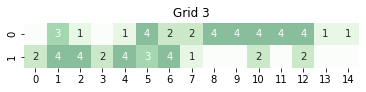

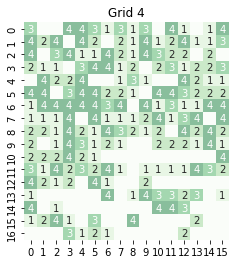

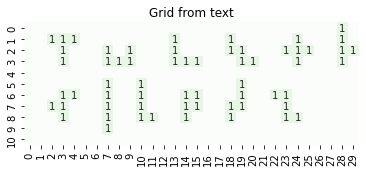

In [5]:
from cactice.plot import plot_grid

for name, grid in grids.items():
    plot_grid(grid, f"Grid {name}")

## Finding tiles

`cactice` can search grids for "tiles" (contiguous regions) of a particular class. For instance, to find non-empty tiles (in this case consisting of `#` characters) in a binary grid:

In [6]:
from cactice.tiles import find_tiles

tiles = find_tiles(grids['from text'], target=1)
print("Tiles:")
pprint(tiles)

Tiles:
[[[0, 28], [1, 28], [2, 28], [2, 29], [3, 28]],
 [[1, 2], [1, 3], [1, 4], [2, 3], [3, 3]],
 [[1, 13], [2, 13], [3, 13], [3, 14], [3, 15]],
 [[1, 18], [2, 18], [2, 19], [3, 19], [3, 20]],
 [[1, 24], [2, 23], [2, 24], [2, 25], [3, 24]],
 [[2, 7], [2, 9], [3, 7], [3, 8], [3, 9]],
 [[5, 7], [6, 7], [7, 7], [8, 7], [9, 7]],
 [[5, 10], [6, 10], [7, 10], [8, 10], [8, 11]],
 [[5, 19], [6, 19], [7, 18], [7, 19], [8, 18]],
 [[6, 3], [6, 4], [7, 2], [7, 3], [8, 3]],
 [[6, 14], [6, 15], [6, 15], [7, 14], [7, 15], [8, 14]],
 [[6, 22], [6, 23], [7, 23], [8, 23], [8, 24]]]
